# Notebook to EDA and prep of the target MA opioid overdose deaths yearly table data
* City/Town name cleanup and matching, if needed
* EDA on the raw counts - data distribution, etc
* Note: the reporting style for MA city/town-level opioid overdose deaths has changed over the years, could only find data going back to 2012. Formatting was changed to tabulate opioid overdose deaths based on place of residence of descendent of deceased (Table 1) and by location of death (Table 2). 

### Outputs:
* Opioid overdose deaths by MA town/city Table 1: /data/tidy_data/ma_town_opioid_overdose_death_by_place_of_resid_2014_to_2018.csv
* Opioid overdose deaths by MA town/city Table 2: /data/tidy_data/ma_town_opioid_overdose_death_by_place_of_death_2014_to_2018.csv
* Opioid overdose deaths Table 2 (2014-2018) + Older data (unintended opioid death), 2012-2013: /data/tidy_data/ma_town_opioid_overdose_death_by_place_of_death_2012_to_2018_merge.csv

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# MA gov opioid overdose deaths table 1 (by town of residence of descendent)
table1_raw = pd.read_csv("../../data/raw_data/ma_overdose_death_by_town_2014_2018_table1.csv")
# MA gov opioid overdose deaths table 2 (by town of death)
table2_raw = pd.read_csv("../../data/raw_data/ma_town_opioid_overdose_death_by_place_of_death_2014_to_2018.csv")
# add on 2012-2014 "unintentional opioid overdose deaths" - based on info, tabulation seems to be based on 
# location of death (similar to table 2 data)
table_12_to_14 = pd.read_csv("../../data/raw_data/ma_overdose_death_by_town_2012_to_2014_uninten_deaths.csv")

In [3]:
print(table1_raw.shape)
print(table2_raw.shape)
print(table_12_to_14.shape)
display(table1_raw.head())
display(table2_raw.head())
display(table_12_to_14.head())

(353, 6)
(354, 6)
(353, 4)


,City/Town of Residence,2014,2015,2016,2017,2018
0,Abington,2,6,2,4,11
1,Acton,3,4,7,1,4
2,Acushnet,1,4,4,7,2
3,Adams,2,3,1,0,7
4,Agawam,3,5,4,7,12


,City/Town of Death,2014,2015,2016,2017,2018
0,Abington,0,6,1,3,5
1,Acton,1,2,3,0,1
2,Acushnet,0,4,2,4,0
3,Adams,2,3,1,0,4
4,Agawam,1,2,0,4,8


,City/Town,2012,2013,2014
0,Abington,1,2,2
1,Acton,2,0,3
2,Acushnet,2,0,0
3,Adams,1,1,2
4,Agawam,1,3,3


In [4]:
table1 = table1_raw.copy()
table2 = table2_raw.copy()
table_older = table_12_to_14.copy()
table1.columns = ['city_resid'] + list(table1_raw.columns[1:])
table2.columns = ['city_death'] + list(table2_raw.columns[1:])
table_older.columns = ['city_death'] + list(table_12_to_14.columns[1:])

In [5]:
# why more 1 more row in table 2?
print(set(table2['city_death']) - set(table1['city_resid']))
# this is mass residents that died outside of massachusetts
print(set(table2['city_death']) - set(table_older['city_death']))

{'Out Of Massachusetts'}
{'Out Of Massachusetts', 'Total'}


In [6]:
# convert city names to lowercase, use as index
table1['city_resid'] = table1['city_resid'].str.lower()
table2['city_death'] = table2['city_death'].str.lower()
table_older['city_death'] = table_older['city_death'].str.lower()
table1.set_index('city_resid', inplace=True)
table2.set_index('city_death', inplace=True)
table_older.set_index('city_death', inplace=True)

In [7]:
display(table1.head())
display(table2.head())
display(table_older.head())

,2014,2015,2016,2017,2018
city_resid,,,,,
abington,2,6,2,4,11
acton,3,4,7,1,4
acushnet,1,4,4,7,2
adams,2,3,1,0,7
agawam,3,5,4,7,12


,2014,2015,2016,2017,2018
city_death,,,,,
abington,0,6,1,3,5
acton,1,2,3,0,1
acushnet,0,4,2,4,0
adams,2,3,1,0,4
agawam,1,2,0,4,8


,2012,2013,2014
city_death,,,
abington,1,2,2
acton,2,0,3
acushnet,2,0,0
adams,1,1,2
agawam,1,3,3


In [8]:
table2.loc['out of massachusetts']

2014    29
2015    52
2016    90
2017    80
2018    62
Name: out of massachusetts, dtype: int64

In [9]:
totals = pd.concat([table1.loc[['total']], table2.loc[['total']]], axis=0).reset_index()
totals['table'] = ['town_of_residence', 'town_of_death']
totals.drop('index', inplace=True, axis=1)

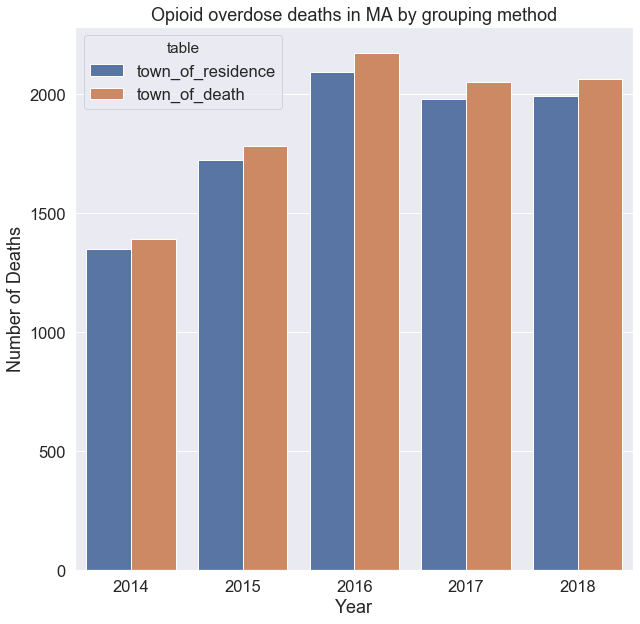

In [10]:
# how do the total death counts compare between the two tables?
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
sns.barplot(x='variable', y='value', hue='table', data=totals.melt(id_vars=['table']))
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Opioid overdose deaths in MA by grouping method')
plt.show()

In [11]:
# totals check to make sure sum of all rows matches Total row
table1_tot = table1.loc['total']
table2_tot = table2.loc['total']
table1.drop('total', inplace=True)
table2.drop('total', inplace=True)
print(table1.sum() - table1_tot)
print(table2.sum() - table2_tot)
# everything matches up

2014    0
2015    0
2016    0
2017    0
2018    0
dtype: int64
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: int64


In [16]:
# drop a couple of extra rows that will not be used in prediction model
table1.drop('unknown', inplace=True)
table2.drop(['unknown', 'out of massachusetts'], inplace=True)
print(table1.shape)
print(table2.shape)

(351, 5)
(351, 5)


In [17]:
display(table1.describe())
display(table2.describe())

,2014,2015,2016,2017,2018
count,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3.846154,4.905983,5.965812,5.638177,5.669516
std,8.769051,12.030188,14.216850,14.080488,14.013021
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,5.000000,6.000000,6.000000,6.000000
max,108.000000,151.000000,194.000000,198.000000,181.000000


,2014,2015,2016,2017,2018
count,351.000000,351.000000,351.000000,351.000000,351.000000
mean,3.888889,4.931624,5.940171,5.615385,5.700855
std,12.331222,16.672335,18.792684,18.965463,18.375729
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,3.500000,4.000000,4.000000
max,167.000000,226.000000,259.000000,279.000000,245.000000


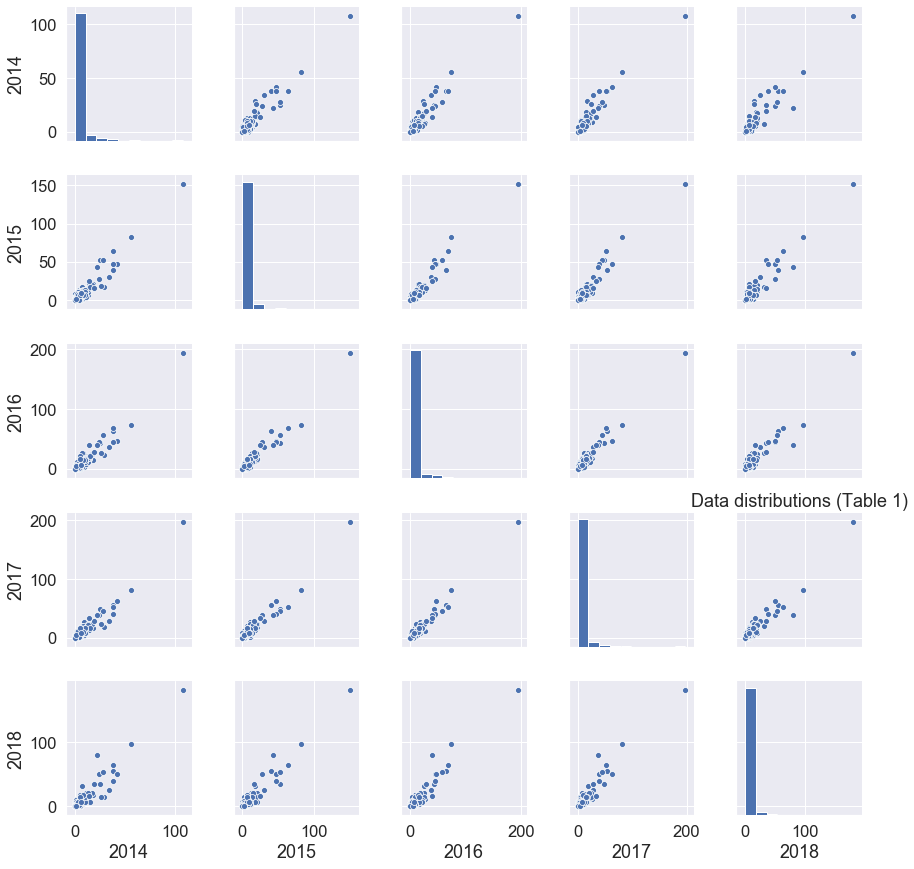

In [18]:
sns.pairplot(table1)
plt.title('Data distributions (Table 1)')
plt.show()

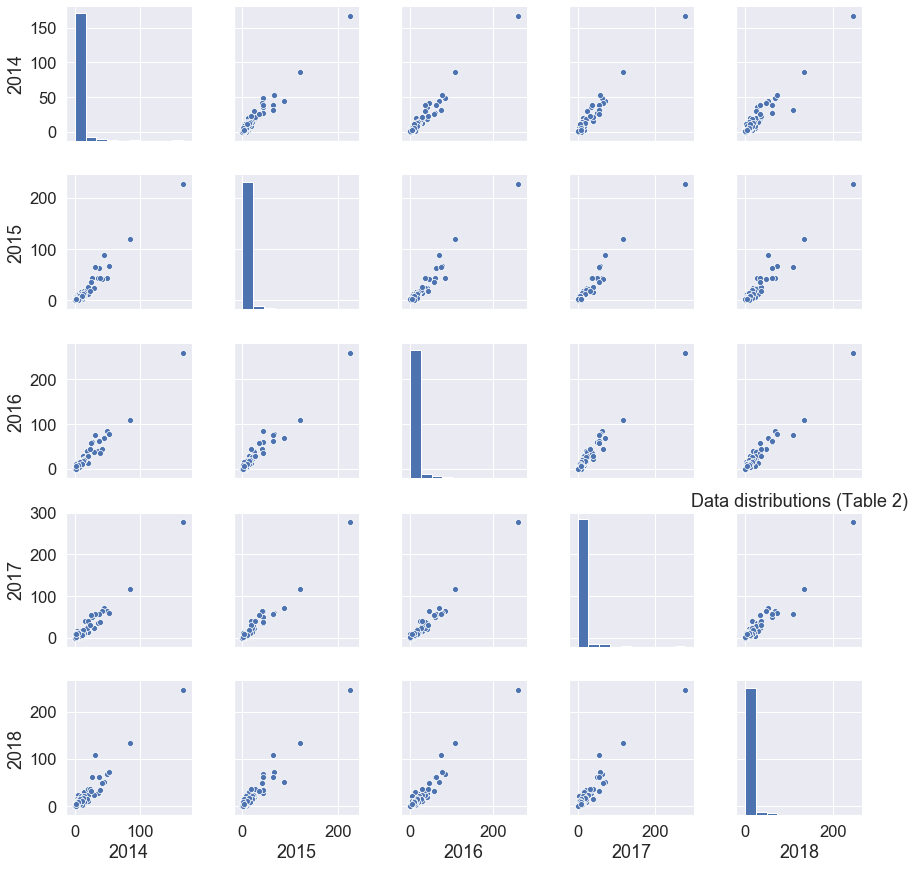

In [19]:
sns.pairplot(table2)
plt.title('Data distributions (Table 2)')
plt.show()

In [20]:
display(table1[table1['2014'] > 50])
display(table2[table2['2017'] > 100])

,2014,2015,2016,2017,2018
city_resid,,,,,
boston,108,151,194,198,181
worcester,56,82,74,82,97


,2014,2015,2016,2017,2018
city_death,,,,,
boston,167,226,259,279,245
worcester,86,120,109,118,134


In [21]:
table2.head()

,2014,2015,2016,2017,2018
city_death,,,,,
abington,0,6,1,3,5
acton,1,2,3,0,1
acushnet,0,4,2,4,0
adams,2,3,1,0,4
agawam,1,2,0,4,8


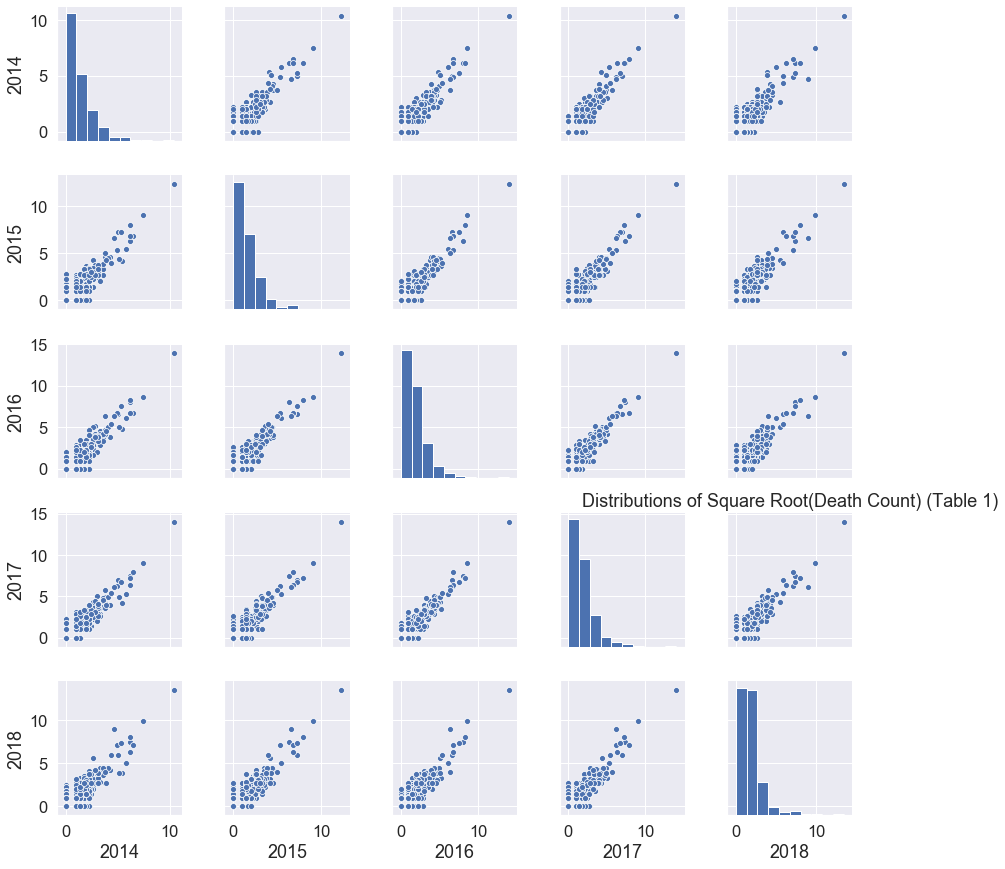

In [22]:
# square root all values to get a better look at data (vs log - infinity for all zeroes)
sns.pairplot(table1.apply(np.sqrt))
plt.title('Distributions of Square Root(Death Count) (Table 1)')
plt.show()

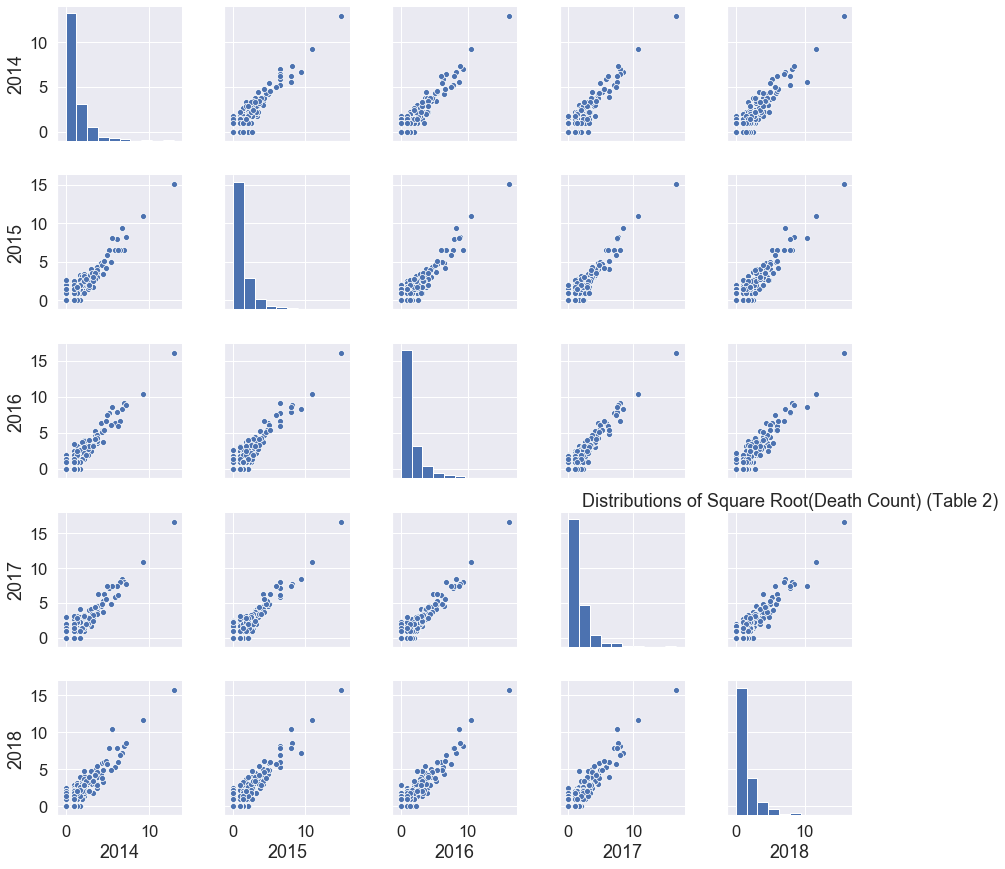

In [23]:
# square root all values to get a better look at data (vs log - infinity for all zeroes)
sns.pairplot(table2.apply(np.sqrt))
plt.title('Distributions of Square Root(Death Count) (Table 2)')
plt.show()

Notes:
* Overall, most death counts are close to 0 for MA towns - zero heavy distributions
* Boston and Worcester have highest death counts, but these are the cities with highest population counts in MA
* Strong positive relationship between death counts year over year for each town (not surprising)
* Normalize death count to population count for each town - need population estimate for each town

In [24]:
#table1.to_csv("../../data/tidy_data/ma_town_opioid_overdose_death_by_place_of_resid_2014_to_2018.csv")
#table2.to_csv("../../data/tidy_data/ma_town_opioid_overdose_death_by_place_of_death_2014_to_2018.csv")

In [33]:
# merge to determine if compantible
table_data_test = table_older.merge(table2, on="city_death", suffixes = ["_old", "_updt"], how="inner")
table_data_test.head()

,2012,2013,2014_old,2014_updt,2015,2016,2017,2018
city_death,,,,,,,,
abington,1,2,2,0,6,1,3,5
acton,2,0,3,1,2,3,0,1
acushnet,2,0,0,0,4,2,4,0
adams,1,1,2,2,3,1,0,4
agawam,1,3,3,1,2,0,4,8


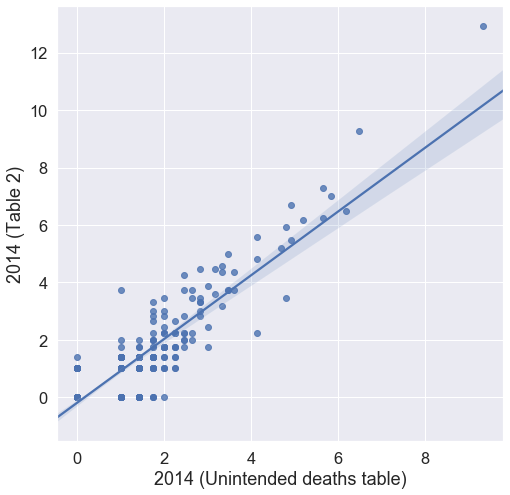

In [34]:
plt.figure(figsize=(8,8))
sns.regplot(x='2014_old', y='2014_updt', data=table_data_test.apply(np.sqrt))
plt.xlabel('2014 (Unintended deaths table)')
plt.ylabel('2014 (Table 2)')
plt.show()

In [35]:
table_data_test.shape

(351, 8)

In [38]:
opioid_death_merge = table_older.drop('2014', axis=1).merge(table2, on="city_death", suffixes = ["_old", "_updt"], how="inner")
opioid_death_merge.head()

,2012,2013,2014,2015,2016,2017,2018
city_death,,,,,,,
abington,1,2,0,6,1,3,5
acton,2,0,1,2,3,0,1
acushnet,2,0,0,4,2,4,0
adams,1,1,2,3,1,0,4
agawam,1,3,1,2,0,4,8


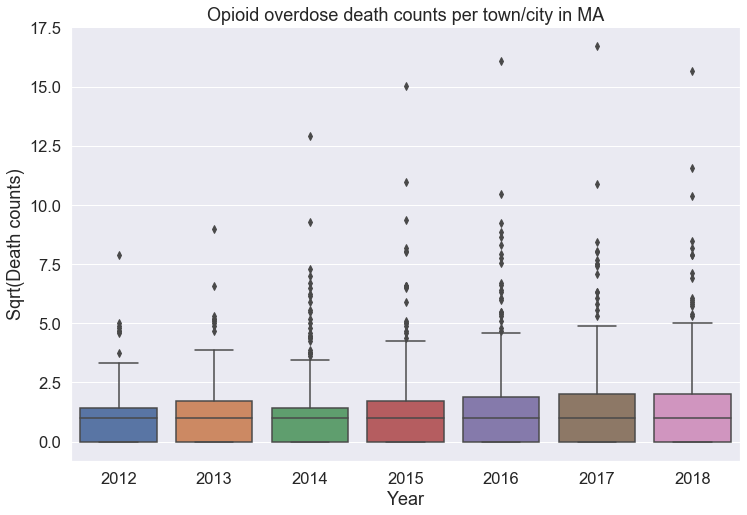

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(data=opioid_death_merge.apply(np.sqrt))
plt.xlabel('Year')
plt.ylabel('Sqrt(Death counts)')
plt.title('Opioid overdose death counts per town/city in MA')
plt.show()

In [44]:
#opioid_death_merge.to_csv("../../data/tidy_data/ma_town_opioid_overdose_death_by_place_of_death_2012_to_2018_merge.csv")